# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement

Questions: 
- Among the top 1000 movies, what percenetage of movies are horror movies?
- Whats the gross revenue of horror movies versus years? Growth rate?
- What are the factors that would affect the gross revenue of horror movies?

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### Dataset 1: Top 1000 IMDb rated movie
This dataset collects the top 1000 IMDb rated movie

Type: CSV

Method: Gather and extract data from HTML files using BeautifulSoup

Dataset variables:

*   __*name:*__ Name of the movie
*   __*year:*__ Make Year of the movie
*   __*category:*__ Genre of the movie
*   __*rating:*__ Rating of the movie
*   __*metascore:*__ Metascore of the movie
*   __*votes:*__ Number of votes of the movie
*   __*gross:*__ Gross revenue of the movie


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from bs4 import BeautifulSoup
import pandas as pd
import requests
import time
import re

# IMDb "Top 1000" (Sorted by IMDb Rating Descending)
# 250 titles per url
urls = ['https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=250&start=1&ref_=adv_nxt',
       'https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=250&start=251&ref_=adv_nxt',
       'https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=250&start=501&ref_=adv_nxt',
       'https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=250&start=751&ref_=adv_nxt']



In [2]:
movie_name=[]
year_of_release=[]
category=[]
rating=[]
metascore=[]
votes=[]
gross=[]

In [3]:
for url in urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.content,'html.parser')
    movie_data = soup.findAll('div',attrs={'class':'lister-item mode-advanced'})
    
    for i in movie_data:
        name = i.h3.a.text
        movie_name.append(name)
        year = i.h3.find('span', class_='lister-item-year text-muted unbold').text.replace('(','').replace(')','')
        year_of_release.append(year)
        genre = i.p.find('span', class_='genre').text.replace('\n','').replace('            ','')
        category.append(genre)
        rate = i.find('div', class_ = 'inline-block ratings-imdb-rating').text.replace('\n','')
        rating.append(rate)
        mscore = i.find('span', class_ = 'metascore').text.replace('        ','') if i.find('span', class_ = 'metascore') else np.nan
        metascore.append(mscore)
        value = i.find_all('span', attrs ={'name':'nv'})
        votes.append(value[0].text)
        grosses=value[1].text if len(value)>1 else np.nan
        gross.append(grosses)


In [4]:
    df_top_1000 = pd.DataFrame({'name':movie_name,
                         'year':year_of_release,
                         'category': category,
                         'rating':rating,
                         'metascore':metascore,
                         'votes':votes,
                         'gross':gross
                        })

In [5]:
df_top_1000.shape

(1000, 7)

#### Dataset 2 - Horror Movie Dataset
This dataset collects horrow movies info from 1920 to 2023.

Type: CSV file

Method: Download manually from Kaggle <br>(https://www.kaggle.com/datasets/shreyanshverma27/imdb-horror-chilling-movie-dataset)

Dataset variables:

*   __*Movie Title:*__ Name of the movie
*   __*Movie Year:*__ Make Year of the movie
*   __*Runtime:*__ Length of the movie
*   __*Genre:*__ Genre of the movie
*   __*Rating:*__ Rating of the movie
*   __*Director:*__ Name of the director
*   __*Votes:*__ Number of votes of the movie
*   __*Gross:*__ Gross revenue of the movie

In [6]:
#FILL IN 2nd data gathering and loading method
df2_horror_movies = pd.read_csv('Horror Movies IMDb.csv')

In [7]:
df2_horror_movies.sample(10)

Movie Title  Movie Year  Runtime  \
544              Victor Frankenstein        2015      110   
14                         King Kong        1933      100   
703               The Stepford Wives        2004       93   
151                      Constantine        2005      121   
51                        Grindhouse        2007      191   
767          Silent Hill: Revelation        2012       95   
566  Pride and Prejudice and Zombies        2016      108   
17                   I Saw the Devil        2010      144   
749                     The Haunting        1999      113   
173                         Ravenous        1999      101   

                         Genre  Rating          Director     Votes    Gross  
544      Drama, Horror, Sci-Fi     5.9     Paul McGuigan    58,423   $5.78M  
14   Adventure, Horror, Sci-Fi     7.9  Merian C. Cooper    88,019  $10.00M  
703     Comedy, Horror, Sci-Fi     5.3          Frank Oz    68,040  $59.48M  
151    Action, Fantasy, Horror     7.0  Francis Lawrence  3,59,071  $75.98M  
51    Action, Horror, Thriller     7.5  Robert Rodriguez  1,87,623  $25.04M  
767  Horror, Mystery, Thriller     4.9      M.J. Bassett    65,270  $17.53M  
566    Action, Comedy, Fantasy     5.8       Burr Steers    58,473  $10.91M  
17       Action, Crime, Horror     7.8      Jee-woon Kim  1,37,559   $0.13M  
749   Fantasy, Horror, Mystery     5.0       Jan de Bont    78,402  $91.41M  
173   Adventure, Drama, Horror     6.9      Antonia Bird    41,616   $2.06M

In [8]:
df2_horror_movies.shape

(836, 8)

Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [9]:
#Optional: store the raw data in your local data store

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue on Dataset 1

#### Inspecting the dataframe visually

In [10]:
#FILL IN - Inspecting the dataframe visually
df_top_1000.sample(10)

name  year                   category  \
760                               Coraline  2009   Animation, Drama, Family   
742  The Discreet Charm of the Bourgeoisie  1972                     Comedy   
424        Who's Afraid of Virginia Woolf?  1966                      Drama   
858                             Black Book  2006       Drama, Thriller, War   
195                           Vikram Vedha  2017       Action, Crime, Drama   
1                            The Godfather  1972               Crime, Drama   
143                          Jurassic Park  1993  Action, Adventure, Sci-Fi   
985              The Last King of Scotland  2006  Biography, Drama, History   
806                         X: First Class  2011             Action, Sci-Fi   
829                   Fried Green Tomatoes  1991                      Drama   

    rating metascore      votes     gross  
760    7.7        80    253,660   $75.29M  
742    7.8        93     45,556    $0.20M  
424    8.0        75     78,574       NaN  
858    7.7        71     79,346    $4.40M  
195    8.2       NaN     49,130       NaN  
1      9.2       100  1,958,323  $134.97M  
143    8.2        68  1,038,368  $402.45M  
985    7.6        74    193,181   $17.61M  
806    7.7        65    712,742  $146.41M  
829    7.7        64     79,789   $82.42M

- Missing values exist (**Completeness** issue)

#### Inspecting the dataframe programmatically

In [11]:
df_top_1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       1000 non-null   object
 1   year       1000 non-null   object
 2   category   1000 non-null   object
 3   rating     1000 non-null   object
 4   metascore  845 non-null    object
 5   votes      1000 non-null   object
 6   gross      834 non-null    object
dtypes: object(7)
memory usage: 54.8+ KB


- year, rating, metascore, volts, and gross should be numerical (**Validity** issue)

In [12]:
df_top_1000.duplicated().sum()

0

- No **Uniquenes** issue

### Quality Issue on Dataset 2

#### Inspecting the dataframe visually

In [13]:
df2_horror_movies.sample(10)

Movie Title  Movie Year  Runtime  \
141                                          Pearl        2022      103   
747                        47 Meters Down: Uncaged        2019       90   
402                          Underworld: Awakening        2012       88   
682  A Nightmare on Elm Street 2: Freddy's Revenge        1985       87   
201                                      Creepshow        1982      120   
289                                 It Chapter Two        2019      169   
384                                          Devil        2010       80   
151                                    Constantine        2005      121   
610                              The Last Exorcism        2010       87   
187                                    Insidious I        2010      103   

                         Genre  Rating           Director     Votes     Gross  
141    Drama, Horror, Thriller     7.0            Ti West    60,574       NaN  
747   Adventure, Drama, Horror     5.0   Johannes Roberts    28,859   $22.26M  
402    Action, Fantasy, Horror     6.3       Måns Mårlind  1,57,941   $62.32M  
682                     Horror     5.4       Jack Sholder    73,312   $30.00M  
201    Comedy, Fantasy, Horror     6.8   George A. Romero    50,496   $21.03M  
289     Drama, Fantasy, Horror     6.5    Andy Muschietti  2,81,137  $211.59M  
384  Horror, Mystery, Thriller     6.3  John Erick Dowdle  1,51,728   $33.58M  
151    Action, Fantasy, Horror     7.0   Francis Lawrence  3,59,071   $75.98M  
610  Horror, Mystery, Thriller     5.7       Daniel Stamm    50,953   $41.03M  
187  Horror, Mystery, Thriller     6.8          James Wan  3,19,707   $54.01M

- Missing values exist (**Completeness** issue)

#### Inspecting the dataframe programmatically

In [14]:
df2_horror_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie Title  836 non-null    object 
 1   Movie Year   836 non-null    int64  
 2   Runtime      836 non-null    int64  
 3   Genre        836 non-null    object 
 4   Rating       836 non-null    float64
 5   Director     836 non-null    object 
 6   Votes        836 non-null    object 
 7   Gross        637 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 52.4+ KB


- volts and gross should be numerical (**Validity** issue)

In [15]:
df2_horror_movies.duplicated().sum()

0

- No **Uniquenes** issue

### Tidiness Issue on Dataset 1:

In [16]:
df_top_1000.head()

name  year  \
0                       The Shawshank Redemption  1994   
1                                  The Godfather  1972   
2                                The Dark Knight  2008   
3                               Schindler's List  1993   
4  The Lord of the Rings: The Return of the King  2003   

                    category rating metascore      votes     gross  
0                      Drama    9.3        82  2,810,128   $28.34M  
1               Crime, Drama    9.2       100  1,958,323  $134.97M  
2       Action, Crime, Drama    9.0        84  2,791,759  $534.86M  
3  Biography, Drama, History    9.0        95  1,412,629   $96.90M  
4   Action, Adventure, Drama    9.0        94  1,923,739  $377.85M

- Category variable contains multiple values (**Data Structuring** issue)

### Tidiness Issue on Dataset 2: 

In [17]:
df2_horror_movies.head()

Movie Title  Movie Year  Runtime                      Genre  Rating  \
0        Alien        1979      117             Horror, Sci-Fi     8.5   
1       Psycho        1960      109  Horror, Mystery, Thriller     8.5   
2  The Shining        1980      146              Drama, Horror     8.4   
3    The Thing        1982      109    Horror, Mystery, Sci-Fi     8.2   
4      Tumbbad        2018      104     Drama, Fantasy, Horror     8.2   

           Director      Votes    Gross  
0      Ridley Scott   9,05,275  $78.90M  
1  Alfred Hitchcock   6,89,068  $32.00M  
2   Stanley Kubrick  10,51,582  $44.02M  
3    John Carpenter   4,39,793  $13.78M  
4   Rahi Anil Barve     53,297      NaN

- Genre variable contains multiple values (**Data Structuring** issue)

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [18]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted

df1 = df_top_1000.copy()
df2 = df2_horror_movies.copy()

### **Quality Issue 1: FILL IN**

#### Fixing Validity issue
**years:**
- Some of the year has I,II in the front
- numbers are the last four characters

In [19]:
df1['year'] = df1['year'].apply(lambda x: x[-4:])
df1['year'] = df1['year'].astype(int)

**rating:**

In [20]:
df1.rating = df1.rating.astype(float)

**votes:**

In [21]:
df1.votes = df1.votes.apply(lambda x: x.replace(',',''))
df1.votes = df1.votes.astype(int)

**gross:**

In [22]:
df1.gross = df1.gross.astype(str)
df1.gross = df1.gross.apply(lambda x: x.replace('$','').replace('M',''))

In [23]:
# There are '#' in the gross
df1.gross = df1.gross.apply(lambda x: x.replace('#','') if '#' in x else x)

In [24]:
df1['gross'] = df1['gross'].astype(float)

In [25]:
df1.rename(columns={'gross':'gross(millions)'},inplace=True)

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1000 non-null   object 
 1   year             1000 non-null   int64  
 2   category         1000 non-null   object 
 3   rating           1000 non-null   float64
 4   metascore        845 non-null    object 
 5   votes            1000 non-null   int64  
 6   gross(millions)  834 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


#### Fixing Completeness issue

In [27]:
df1_gross = df1[~df1['gross(millions)'].isna()]
df1_gross_na = df1[df1['gross(millions)'].isna()]

In [28]:
df1_gross_na

name  year                      category  \
15                     777 Charlie  2022      Adventure, Comedy, Drama   
22      Rocketry: The Nambi Effect  2022              Biography, Drama   
23                 Soorarai Pottru  2020                 Action, Drama   
36                      Sita Ramam  2022        Action, Drama, Mystery   
59                              96  2018                Drama, Romance   
..                             ...   ...                           ...   
979                    Dark Waters  2019     Biography, Drama, History   
981  The Mitchells vs the Machines  2021  Animation, Action, Adventure   
982              The Invisible Man  1933                Horror, Sci-Fi   
989          Rebel Without a Cause  1955                         Drama   
999                       Cell 211  2009          Action, Crime, Drama   

     rating metascore   votes  gross(millions)  
15      8.8       NaN   37144              NaN  
22      8.7       NaN   55772              NaN  
23      8.7       NaN  121172              NaN  
36      8.6       NaN   63545              NaN  
59      8.5       NaN   34577              NaN  
..      ...       ...     ...              ...  
979     7.6        73   96392              NaN  
981     7.6        81  121375              NaN  
982     7.6        87   38624              NaN  
989     7.6        89   95954              NaN  
999     7.6       NaN   69827              NaN  

[166 rows x 7 columns]

In [29]:
key = df1['category'].unique()
key = np.sort(key)

In [30]:
values = df1.groupby(by=['category'])['gross(millions)'].mean()

In [31]:
values = np.array(values)

In [32]:
Dict = dict(zip(key, values))

In [33]:
df1_gross_na['gross(millions)'] = df1_gross_na['category'].apply(lambda x:Dict[x])
df1_gross_na

name  year                      category  \
15                     777 Charlie  2022      Adventure, Comedy, Drama   
22      Rocketry: The Nambi Effect  2022              Biography, Drama   
23                 Soorarai Pottru  2020                 Action, Drama   
36                      Sita Ramam  2022        Action, Drama, Mystery   
59                              96  2018                Drama, Romance   
..                             ...   ...                           ...   
979                    Dark Waters  2019     Biography, Drama, History   
981  The Mitchells vs the Machines  2021  Animation, Action, Adventure   
982              The Invisible Man  1933                Horror, Sci-Fi   
989          Rebel Without a Cause  1955                         Drama   
999                       Cell 211  2009          Action, Crime, Drama   

     rating metascore   votes  gross(millions)  
15      8.8       NaN   37144        19.380000  
22      8.7       NaN   55772        57.683077  
23      8.7       NaN  121172       124.524444  
36      8.6       NaN   63545        61.317500  
59      8.5       NaN   34577        62.784375  
..      ...       ...     ...              ...  
979     7.6        73   96392        56.693043  
981     7.6        81  121375       130.066154  
982     7.6        87   38624        78.900000  
989     7.6        89   95954        29.495395  
999     7.6       NaN   69827        94.518889  

[166 rows x 7 columns]

In [34]:
df1 = pd.concat([df1_gross, df1_gross_na])

In [35]:
df1[df1['gross(millions)'].isna()].sort_values(by='category')

name  year                      category  rating  \
686             Thirteen Lives  2022  Action, Adventure, Biography     7.8   
720  Aguirre, the Wrath of God  1972  Action, Adventure, Biography     7.8   
87                      Kaithi  2019      Action, Adventure, Crime     8.4   
727       To Have and Have Not  1944  Adventure, Comedy, Film-Noir     7.8   
729  The Man Who Would Be King  1975                Adventure, War     7.8   
271  A Silent Voice: The Movie  2016              Animation, Drama     8.1   
554               The Thin Man  1934        Comedy, Crime, Mystery     7.9   
493       Arsenic and Old Lace  1944       Comedy, Crime, Thriller     7.9   
334                 The Circus  1928       Comedy, Family, Romance     8.1   
745                  Duck Soup  1933               Comedy, Musical     7.8   
567               The Big Heat  1953    Crime, Film-Noir, Thriller     7.9   
669         The Man from Earth  2007       Drama, Fantasy, Mystery     7.8   
548                The Leopard  1963                Drama, History     7.9   
504                  Nosferatu  1922               Fantasy, Horror     7.9   
701          Shadow of a Doubt  1943           Film-Noir, Thriller     7.8   

    metascore   votes  gross(millions)  
686        66   64164              NaN  
720       NaN   60330              NaN  
87        NaN   38409              NaN  
727        90   37264              NaN  
729        91   51125              NaN  
271        78   94506              NaN  
554        86   31789              NaN  
493       NaN   73707              NaN  
334        90   35359              NaN  
745        93   61949              NaN  
567       NaN   28288              NaN  
669       NaN  195610              NaN  
548       100   28024              NaN  
504       NaN  102722              NaN  
701        94   68967              NaN

### **Quality Issue 2: FILL IN**

In [36]:
df2.head()

Movie Title  Movie Year  Runtime                      Genre  Rating  \
0        Alien        1979      117             Horror, Sci-Fi     8.5   
1       Psycho        1960      109  Horror, Mystery, Thriller     8.5   
2  The Shining        1980      146              Drama, Horror     8.4   
3    The Thing        1982      109    Horror, Mystery, Sci-Fi     8.2   
4      Tumbbad        2018      104     Drama, Fantasy, Horror     8.2   

           Director      Votes    Gross  
0      Ridley Scott   9,05,275  $78.90M  
1  Alfred Hitchcock   6,89,068  $32.00M  
2   Stanley Kubrick  10,51,582  $44.02M  
3    John Carpenter   4,39,793  $13.78M  
4   Rahi Anil Barve     53,297      NaN

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie Title  836 non-null    object 
 1   Movie Year   836 non-null    int64  
 2   Runtime      836 non-null    int64  
 3   Genre        836 non-null    object 
 4   Rating       836 non-null    float64
 5   Director     836 non-null    object 
 6   Votes        836 non-null    object 
 7   Gross        637 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 52.4+ KB


#### Fixing Validity issue

**votes:**

In [38]:
df2.Votes = df2.Votes.apply(lambda x: x.replace(',',''))
df2.Votes = df2.Votes.astype(int)

**gross:**

In [39]:
df2.Gross = df2.Gross.astype(str)
df2.Gross = df2.Gross.apply(lambda x: x.replace('$','').replace('M',''))

In [40]:
df2.Gross=df2.Gross.astype(float)

In [41]:
df2.rename(columns={'Gross':'Gross(millions)'},inplace=True)

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Movie Title      836 non-null    object 
 1   Movie Year       836 non-null    int64  
 2   Runtime          836 non-null    int64  
 3   Genre            836 non-null    object 
 4   Rating           836 non-null    float64
 5   Director         836 non-null    object 
 6   Votes            836 non-null    int64  
 7   Gross(millions)  637 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 52.4+ KB


### **Tidiness Issue 1: FILL IN**

#### Fixing Data Structuring issue
Dataset 1 is the collection of top 1000 movies in IMDb. We do want to keep all records and the metascore is not really important, therefore,
- 1. category into three columns: [genre_1, genre_2, genre_3]
- 2. remove the category and metascore variables
- 3. replace nan in gross by mean of the category (using group-by)

In [43]:
df1['genre_1'] = df1['category'].apply(lambda x:x.split(', ')[0])
df1['genre_2'] = df1['category'].apply(lambda x:x.split(', ')[1] if len(x.split(', '))>1 else np.nan)
df1['genre_3'] = df1['category'].apply(lambda x:x.split(', ')[2] if len(x.split(', '))>2 else np.nan)

In [44]:
arr1=df1.genre_1.unique().astype('str')

In [45]:
arr2=df1.genre_2.unique().astype('str')

In [46]:
arr3=df1.genre_3.unique().astype('str')

In [47]:
genre_all=np.concatenate([arr1,arr2,arr3])
print(np.unique(genre_all))
print(len(np.unique(genre_all)))

['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Drama'
 'Family' 'Fantasy' 'Film-Noir' 'History' 'Horror' 'Music' 'Musical'
 'Mystery' 'Romance' 'Sci-Fi' 'Sport' 'Thriller' 'War' 'Western' 'nan']
22


In [48]:
print(df1.shape)
df1.head()

(1000, 10)


name  year  \
0                       The Shawshank Redemption  1994   
1                                  The Godfather  1972   
2                                The Dark Knight  2008   
3                               Schindler's List  1993   
4  The Lord of the Rings: The Return of the King  2003   

                    category  rating metascore    votes  gross(millions)  \
0                      Drama     9.3        82  2810128            28.34   
1               Crime, Drama     9.2       100  1958323           134.97   
2       Action, Crime, Drama     9.0        84  2791759           534.86   
3  Biography, Drama, History     9.0        95  1412629            96.90   
4   Action, Adventure, Drama     9.0        94  1923739           377.85   

     genre_1    genre_2  genre_3  
0      Drama        NaN      NaN  
1      Crime      Drama      NaN  
2     Action      Crime    Drama  
3  Biography      Drama  History  
4     Action  Adventure    Drama

### **Tidiness Issue 2: FILL IN**

In [49]:
df2['genre_1'] = df2['Genre'].apply(lambda x:x.split(', ')[0])
df2['genre_2'] = df2['Genre'].apply(lambda x:x.split(', ')[1] if len(x.split(', '))>1 else np.nan)
df2['genre_3'] = df2['Genre'].apply(lambda x:x.split(', ')[2] if len(x.split(', '))>2 else np.nan)

In [50]:
df2.head()

Movie Title  Movie Year  Runtime                      Genre  Rating  \
0        Alien        1979      117             Horror, Sci-Fi     8.5   
1       Psycho        1960      109  Horror, Mystery, Thriller     8.5   
2  The Shining        1980      146              Drama, Horror     8.4   
3    The Thing        1982      109    Horror, Mystery, Sci-Fi     8.2   
4      Tumbbad        2018      104     Drama, Fantasy, Horror     8.2   

           Director    Votes  Gross(millions) genre_1  genre_2   genre_3  
0      Ridley Scott   905275            78.90  Horror   Sci-Fi       NaN  
1  Alfred Hitchcock   689068            32.00  Horror  Mystery  Thriller  
2   Stanley Kubrick  1051582            44.02   Drama   Horror       NaN  
3    John Carpenter   439793            13.78  Horror  Mystery    Sci-Fi  
4   Rahi Anil Barve    53297              NaN   Drama  Fantasy    Horror

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [51]:
df1.head()

name  year  \
0                       The Shawshank Redemption  1994   
1                                  The Godfather  1972   
2                                The Dark Knight  2008   
3                               Schindler's List  1993   
4  The Lord of the Rings: The Return of the King  2003   

                    category  rating metascore    votes  gross(millions)  \
0                      Drama     9.3        82  2810128            28.34   
1               Crime, Drama     9.2       100  1958323           134.97   
2       Action, Crime, Drama     9.0        84  2791759           534.86   
3  Biography, Drama, History     9.0        95  1412629            96.90   
4   Action, Adventure, Drama     9.0        94  1923739           377.85   

     genre_1    genre_2  genre_3  
0      Drama        NaN      NaN  
1      Crime      Drama      NaN  
2     Action      Crime    Drama  
3  Biography      Drama  History  
4     Action  Adventure    Drama

Keep:
name, year,rating,metascore,votes,gross,genre_1, genre_2, genre_3 <br>
Drop:
category

In [52]:
df1.drop('category',axis=1,inplace=True)
df1

name  year  rating metascore  \
0                         The Shawshank Redemption  1994     9.3        82   
1                                    The Godfather  1972     9.2       100   
2                                  The Dark Knight  2008     9.0        84   
3                                 Schindler's List  1993     9.0        95   
4    The Lord of the Rings: The Return of the King  2003     9.0        94   
..                                             ...   ...     ...       ...   
979                                    Dark Waters  2019     7.6        73   
981                  The Mitchells vs the Machines  2021     7.6        81   
982                              The Invisible Man  1933     7.6        87   
989                          Rebel Without a Cause  1955     7.6        89   
999                                       Cell 211  2009     7.6       NaN   

       votes  gross(millions)    genre_1    genre_2    genre_3  
0    2810128        28.340000      Drama        NaN        NaN  
1    1958323       134.970000      Crime      Drama        NaN  
2    2791759       534.860000     Action      Crime      Drama  
3    1412629        96.900000  Biography      Drama    History  
4    1923739       377.850000     Action  Adventure      Drama  
..       ...              ...        ...        ...        ...  
979    96392        56.693043  Biography      Drama    History  
981   121375       130.066154  Animation     Action  Adventure  
982    38624        78.900000     Horror     Sci-Fi        NaN  
989    95954        29.495395      Drama        NaN        NaN  
999    69827        94.518889     Action      Crime      Drama  

[1000 rows x 9 columns]

In [53]:
df2.head()

Movie Title  Movie Year  Runtime                      Genre  Rating  \
0        Alien        1979      117             Horror, Sci-Fi     8.5   
1       Psycho        1960      109  Horror, Mystery, Thriller     8.5   
2  The Shining        1980      146              Drama, Horror     8.4   
3    The Thing        1982      109    Horror, Mystery, Sci-Fi     8.2   
4      Tumbbad        2018      104     Drama, Fantasy, Horror     8.2   

           Director    Votes  Gross(millions) genre_1  genre_2   genre_3  
0      Ridley Scott   905275            78.90  Horror   Sci-Fi       NaN  
1  Alfred Hitchcock   689068            32.00  Horror  Mystery  Thriller  
2   Stanley Kubrick  1051582            44.02   Drama   Horror       NaN  
3    John Carpenter   439793            13.78  Horror  Mystery    Sci-Fi  
4   Rahi Anil Barve    53297              NaN   Drama  Fantasy    Horror

Keep:
Title, Year, Director<br>
Drop:
Runtime, Votes, Rating, Votes, Gross, genre_1, genre_2, genre_3 

In [54]:
df2=df2.drop(['Runtime','Genre','Gross(millions)','Rating','Votes',
              'Gross(millions)','genre_1','genre_2','genre_3'],axis=1)
df2.head()

Movie Title  Movie Year          Director
0        Alien        1979      Ridley Scott
1       Psycho        1960  Alfred Hitchcock
2  The Shining        1980   Stanley Kubrick
3    The Thing        1982    John Carpenter
4      Tumbbad        2018   Rahi Anil Barve

In [55]:
df_top1000_horror=df1.merge(df2,how='inner',left_on='name', right_on='Movie Title')
df_left=df1.merge(df2,how='left',left_on='name', right_on='Movie Title')

In [56]:
df_top1000_horror.head()

name  year  rating metascore    votes  gross(millions) genre_1  \
0        Alien  1979     8.5        89   923281            78.90  Horror   
1       Psycho  1960     8.5        97   701679            32.00  Horror   
2       Psycho  1960     8.5        97   701679            32.00  Horror   
3  The Shining  1980     8.4        66  1075121            44.02   Drama   
4    The Thing  1982     8.2        57   450236            13.78  Horror   

   genre_2   genre_3  Movie Title  Movie Year          Director  
0   Sci-Fi       NaN        Alien        1979      Ridley Scott  
1  Mystery  Thriller       Psycho        1960  Alfred Hitchcock  
2  Mystery  Thriller       Psycho        1998      Gus Van Sant  
3   Horror       NaN  The Shining        1980   Stanley Kubrick  
4  Mystery    Sci-Fi    The Thing        1982    John Carpenter

In [57]:
print(df1.shape)
print(df2.shape)
print(df_top1000_horror.shape)

(1000, 9)
(836, 3)
(40, 12)


In [58]:
df_top1000_horror.name.duplicated().sum()

7

In [59]:
# Drop same name but different year
df_top1000_horror = df_top1000_horror[~(df_top1000_horror['year']!=df_top1000_horror['Movie Year'])]

In [60]:
df_top1000_horror.shape

(32, 12)

In [61]:
df_top1000_horror.head()

name  year  rating metascore    votes  gross(millions) genre_1  \
0         Alien  1979     8.5        89   923281            78.90  Horror   
1        Psycho  1960     8.5        97   701679            32.00  Horror   
3   The Shining  1980     8.4        66  1075121            44.02   Drama   
4     The Thing  1982     8.2        57   450236            13.78  Horror   
5  The Exorcist  1973     8.1        82   439076           232.91  Horror   

   genre_2   genre_3   Movie Title  Movie Year          Director  
0   Sci-Fi       NaN         Alien        1979      Ridley Scott  
1  Mystery  Thriller        Psycho        1960  Alfred Hitchcock  
3   Horror       NaN   The Shining        1980   Stanley Kubrick  
4  Mystery    Sci-Fi     The Thing        1982    John Carpenter  
5      NaN       NaN  The Exorcist        1973  William Friedkin

In [62]:
df_top1000_horror=df_top1000_horror.drop(['Movie Title','Movie Year'],axis=1)

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [63]:
# save the combined df
df_top1000_horror.to_csv('master_cleaned.csv')
df = pd.read_csv('master_cleaned.csv',index_col=0)
df.head()

name  year  rating  metascore    votes  gross(millions) genre_1  \
0         Alien  1979     8.5       89.0   923281            78.90  Horror   
1        Psycho  1960     8.5       97.0   701679            32.00  Horror   
3   The Shining  1980     8.4       66.0  1075121            44.02   Drama   
4     The Thing  1982     8.2       57.0   450236            13.78  Horror   
5  The Exorcist  1973     8.1       82.0   439076           232.91  Horror   

   genre_2   genre_3          Director  
0   Sci-Fi       NaN      Ridley Scott  
1  Mystery  Thriller  Alfred Hitchcock  
3   Horror       NaN   Stanley Kubrick  
4  Mystery    Sci-Fi    John Carpenter  
5      NaN       NaN  William Friedkin

## 5. Answer the research question

### **5.1:** Define and answer the research question 

Questions: 
- Among the top 1000 movies, what percenetage of movies are horror movies? What's the Gross revenue of horror movies compare to other genres?
- Which Director contributes the most to the gross revenue in top 1000 movies? Does he/she also has the most number of horror movies selected in top 1000 movies?
- Is there any trend in Horror movie revenue over year in the top 1000 movies?

We will use **df1 (top 1000 movie dataset)** and **df (merged dataset)** datasets to answer those questions.

In [64]:
# Get movies based on specific genre
def get_genre_df1(x):
    df1_genry = df1[(df1['genre_1']==x)|(df1['genre_2']==x)|(df1['genre_3']==x)]
    return df1_genry


In [65]:
get_genre_df1('Horror').head()

name  year  rating metascore    votes  gross(millions) genre_1  \
38          Alien  1979     8.5        89   923281            78.90  Horror   
46         Psycho  1960     8.5        97   701679            32.00  Horror   
61    The Shining  1980     8.4        66  1075121            44.02   Drama   
139     The Thing  1982     8.2        57   450236            13.78  Horror   
207  The Exorcist  1973     8.1        82   439076           232.91  Horror   

     genre_2   genre_3  
38    Sci-Fi       NaN  
46   Mystery  Thriller  
61    Horror       NaN  
139  Mystery    Sci-Fi  
207      NaN       NaN

In [66]:
Rate={}
Vote={}
Gross={}

for x in genre_all:
    Rate[x] = get_genre_df1(x)['rating'].mean()
    Vote[x] = get_genre_df1(x)['votes'].mean()
    Gross[x] = get_genre_df1(x)['gross(millions)'].mean()

Rate_df = pd.DataFrame.from_dict(Rate,orient='index',columns=['Rate']).transpose()
Vote_df = pd.DataFrame.from_dict(Vote,orient='index',columns=['Votes']).transpose()
Gross_df =  pd.DataFrame.from_dict(Gross,orient='index',columns=['Gross']).transpose()


In [67]:
Rate_df2 = Rate_df.transpose().reset_index()
Vote_df2 = Vote_df.transpose().reset_index()
Gross_df2 = Gross_df.transpose().reset_index()

In [68]:
test_df = Rate_df2.merge(Vote_df2, left_on='index', right_on='index').merge(Gross_df2, left_on='index', right_on='index')
test_df

index      Rate          Votes       Gross
0       Drama  7.979783  279366.446404   52.826999
1       Crime  7.994634  348982.121951   48.126639
2      Action  7.985507  470995.985507  139.995057
3   Biography  7.973832  300433.672897   59.232987
4   Adventure  7.987634  497682.172043  166.064863
5   Animation  7.948780  325486.902439  118.471874
6      Comedy  7.914097  278807.162996   67.410298
7      Horror  7.881250  291164.843750   38.548226
8     Mystery  8.000000  341309.970000   47.128410
9     Western  8.052941  301435.411765   71.350588
10  Film-Noir  7.977273   88131.545455    8.650526
11     Family  7.932692  276293.038462   94.887320
12   Thriller  7.927857  343596.378571   67.722317
13    Fantasy  7.927869  428341.655738  132.728447
14        nan       NaN            NaN         NaN
15    Romance  7.939844  217579.281250   42.110170
16     Sci-Fi  7.990909  651795.909091  139.453030
17        War  8.056863  244113.411765   49.911875
18      Music  7.909375  194679.812500   38.894479
19    Musical  7.943750   88081.250000   17.588667
20      Sport  7.980000  272396.066667   49.866667
21    History  7.941304  232566.760870   54.054789

### Among the top 1000 movies, what percenetage of movies are horror movies? What's the Gross revenue of horror movies compare to other genres?

In [69]:
# Plot barplot for genre percentage in top 1000 movies
per_horror = get_genre_df1('Horror').shape[0]/1000*100
print('The percentage of Horror movies in top 1000 movies = {} %'.format(per_horror))

The percentage of Horror movies in top 1000 movies = 3.2 %


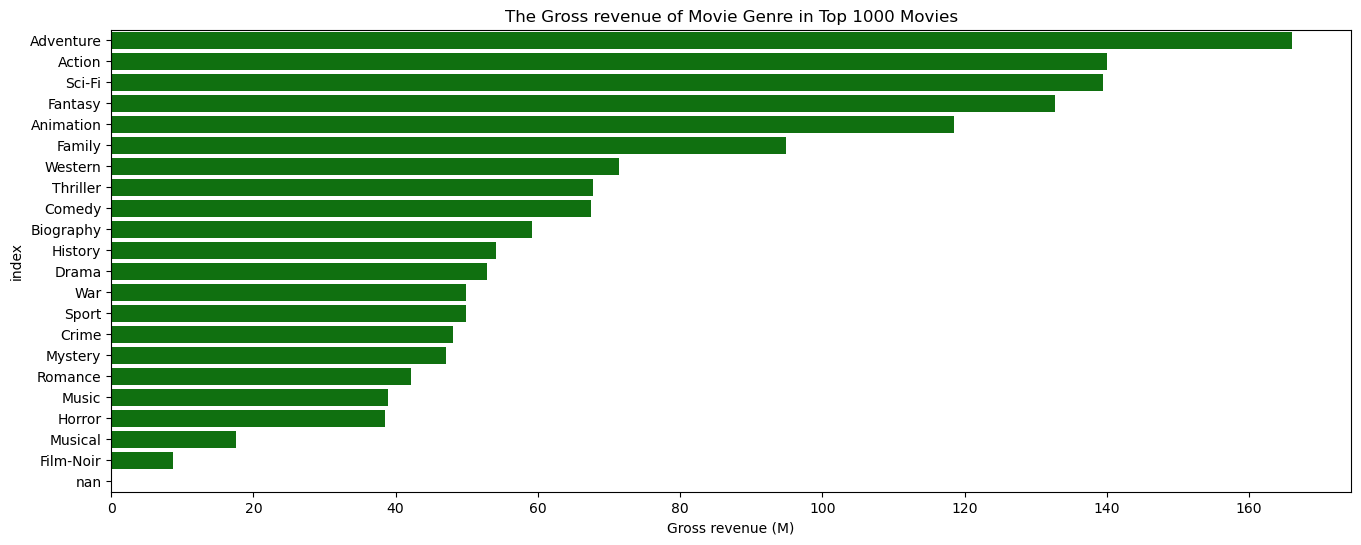

In [70]:
plt.figure(figsize=(16,6))
ax = sns.barplot(test_df.sort_values('Gross',ascending=False),x='Gross',y='index', orient='h', color='Green')
ax.set_title('The Gross revenue of Movie Genre in Top 1000 Movies')
ax.set_xlabel('Gross revenue (M)');

- Among the top 1000 movies, there are **32 Horror movies (3.2%)**
- The sum revenue of top 1000 movies = **1,505 Millions** and Horror movies took over **2.56% (38.55 Millions)** of the total gross revenue. 


### Which Director contributes the most to the gross revenue in top 1000 movies? Does he/she also has the most number of horror movies selected in top 1000 movies?

In [71]:
def get_genre_df(x):
    df_genry = df[(df['genre_1']==x)|(df['genre_2']==x)|(df['genre_3']==x)]
    return df_genry

In [72]:
director = get_genre_df('Horror')
director.head()

name  year  rating  metascore    votes  gross(millions) genre_1  \
0         Alien  1979     8.5       89.0   923281            78.90  Horror   
1        Psycho  1960     8.5       97.0   701679            32.00  Horror   
3   The Shining  1980     8.4       66.0  1075121            44.02   Drama   
4     The Thing  1982     8.2       57.0   450236            13.78  Horror   
5  The Exorcist  1973     8.1       82.0   439076           232.91  Horror   

   genre_2   genre_3          Director  
0   Sci-Fi       NaN      Ridley Scott  
1  Mystery  Thriller  Alfred Hitchcock  
3   Horror       NaN   Stanley Kubrick  
4  Mystery    Sci-Fi    John Carpenter  
5      NaN       NaN  William Friedkin

In [73]:
director_gross = get_genre_df('Horror').groupby('Director')['gross(millions)'].sum().sort_values(ascending=False)
director_gross

Director
William Friedkin         232.910
James Whale              105.670
Alejandro Amenábar        96.520
Robert Wiene              90.140
Ridley Scott              78.900
John Carpenter            60.780
John McTiernan            59.740
James Wan                 56.000
Stanley Kubrick           44.020
Alfred Hitchcock          43.400
David Cronenberg          40.460
Don Siegel                22.410
Roman Polanski            22.325
Mary Harron               15.070
Edgar Wright              13.540
Merian C. Cooper          10.000
Sam Raimi                  5.920
George A. Romero           5.190
Robert Aldrich             4.050
Jemaine Clement            3.330
Jack Clayton               2.620
Rahi Anil Barve            2.120
Tomas Alfredson            2.120
Henri-Georges Clouzot      1.090
Tod Browning               0.630
F.W. Murnau                0.000
Name: gross(millions), dtype: float64

- **William Friedkin** is the director contributed the most to gross revenue of Horror movie genre in top 1000 movies.

In [74]:
director[director.Director=='William Friedkin']

name  year  rating  metascore   votes  gross(millions) genre_1  \
5  The Exorcist  1973     8.1       82.0  439076           232.91  Horror   

  genre_2 genre_3          Director  
5     NaN     NaN  William Friedkin

In [75]:
director.groupby('Director')['year'].count()

Director
Alejandro Amenábar       1
Alfred Hitchcock         2
David Cronenberg         1
Don Siegel               1
Edgar Wright             1
F.W. Murnau              1
George A. Romero         2
Henri-Georges Clouzot    1
Jack Clayton             1
James Wan                1
James Whale              3
Jemaine Clement          1
John Carpenter           2
John McTiernan           1
Mary Harron              1
Merian C. Cooper         1
Rahi Anil Barve          1
Ridley Scott             1
Robert Aldrich           1
Robert Wiene             1
Roman Polanski           1
Sam Raimi                1
Stanley Kubrick          1
Tod Browning             1
Tomas Alfredson          1
William Friedkin         1
Name: year, dtype: int64

In [76]:
director[director.Director=='James Whale']

name  year  rating  metascore  votes  \
18  The Bride of Frankenstein  1935     7.8       95.0  51581   
34               Frankenstein  1931     7.8       91.0  77427   
39          The Invisible Man  1933     7.6       87.0  38624   

    gross(millions) genre_1 genre_2 genre_3     Director  
18             4.36   Drama  Horror  Sci-Fi  James Whale  
34            22.41   Drama  Horror  Sci-Fi  James Whale  
39            78.90  Horror  Sci-Fi     NaN  James Whale

- **James Whale** is the director contributed the most number of Horror movies in top 1000 movies.

### Is there any trend in Horror movie revenue over year in the top 1000 movies?

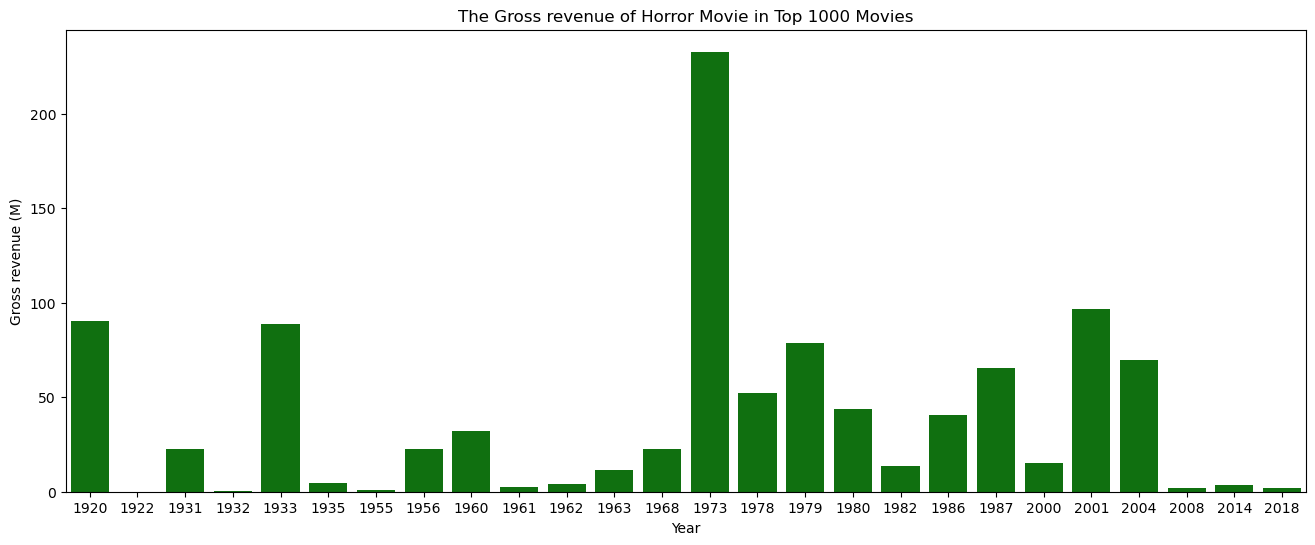

In [77]:
plt.figure(figsize=(16,6))
ax = sns.barplot(director.groupby('year').sum().reset_index(), x='year',y='gross(millions)',orient='v', color='Green')
ax.set_title('The Gross revenue of Horror Movie in Top 1000 Movies')
ax.set_xlabel('Year');
ax.set_ylabel('Gross revenue (M)');

- The gross revenue of Horror movies in top 1000 movies over year are **mostly less than 100 millions**. The only exception is at **1973**, where William Friedkin's movie **The Exorcist** make a contribution to 232 millions in single movie.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

If have more time, I'll:
- 1. collect more data regards to revenue and directors.
- 2. look into whether combination of genres will correlate to the gross revenues.